# General REDCOMETS test

In [1]:
import sys, os
sys.path.append(os.path.abspath('..'))

from helpers import *
from Redcomets import REDCOMETS
from aeon.datasets import load_unit_test

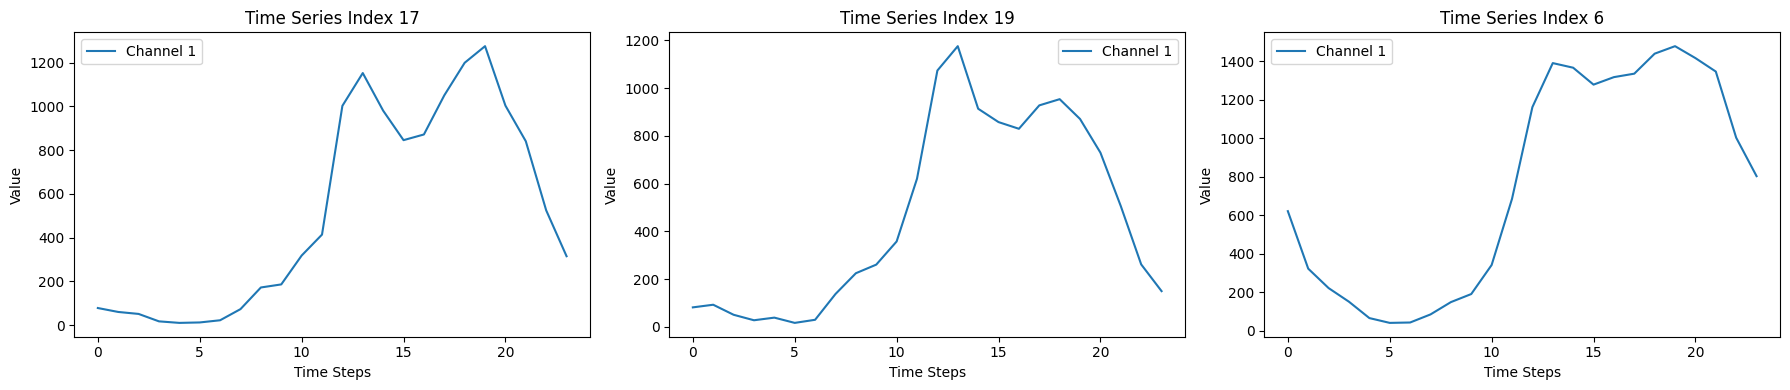

In [2]:
X_train, y_train = load_unit_test(split="train")
X_test, y_test = load_unit_test(split="test")

#Plot them
plot_random_time_series(X_train, n = 3)

In [3]:
X_train, y_train = load_unit_test(split="train")
X_test, y_test = load_unit_test(split="test")
clf = REDCOMETS()  
clf.fit(X_train, y_train)  

y_pred = clf.predict(X_test)  

In [5]:
clf.get_ensemble_proximities(X_train)

array([[1.        , 0.91947368, 0.93842105, 0.60684211, 0.82      ,
        0.88631579, 0.76315789, 0.76789474, 0.70157895, 0.70157895,
        0.59736842, 0.55      , 0.57368421, 0.54052632, 0.54526316,
        0.55473684, 0.55      , 0.55      , 0.55947368, 0.55      ],
       [0.91947368, 1.        , 0.85789474, 0.62578947, 0.86736842,
        0.95736842, 0.78210526, 0.78684211, 0.72052632, 0.72526316,
        0.65421053, 0.57368421, 0.55947368, 0.56894737, 0.57368421,
        0.59263158, 0.59263158, 0.60210526, 0.60210526, 0.56421053],
       [0.93842105, 0.85789474, 1.        , 0.56421053, 0.75842105,
        0.82947368, 0.70631579, 0.71105263, 0.66368421, 0.66368421,
        0.64      , 0.54052632, 0.60210526, 0.56894737, 0.53578947,
        0.57368421, 0.57842105, 0.53105263, 0.60210526, 0.58315789],
       [0.60684211, 0.62578947, 0.56421053, 1.        , 0.72052632,
        0.63526316, 0.77736842, 0.78684211, 0.78210526, 0.76789474,
        0.63526316, 0.69684211, 0.63052632, 0

# Trial Two? 